# Скуп података EurLex57k

У овој секцији упознаћемо нешто детаљније скупу података **ЕurLex57k**.   

Скуп података **EurLex57k** представља колекцију од 57 хиљада докумената преузетих са платформе <a href='https://eur-lex.europa.eu/homepage.html'> EUR-lex </a>. Платформа EUR-lex је централна платформа преко које се са јавношћу деле званични документи Европске уније попут закона, међународних споразума, судских пракси, националних мера транспозиције и многих других типова правних докумената. Сваки од ових докумената је доступан на 24 званична језика Европске уније, али скуп података EurLex57k обједињује само верзије ових докумената на енглеском језику. 

Сваки документ скупа података EurLex57k има свој јединствени идентификатор, такозвани CELEX број. CELEX број се састоји из 4 дела: назнаке сектора којем документ припада, четвороцифрене године објављивања документа, дескриптора документа и броја документа. Сектора има укупно 12 и обележавају се бројевима од 0 до 9 или латиничним словима C и Е. Тако, на пример, сектору 9 припадају документа која се односе на парламентарна питања, а сектору 4 документа комплемнтарног законодавства. Дескриптор документа се састоји од једног или два слова са предефинисаним значењем. На пример, латинично слово *L* се односи на директиве, латинично слово *R* на регулативе, а латинично слово *D* на одлуке. Број документа се записује као четвороцифрени број и представља званични број, интерни број или датум публиковања. Постоје и нека одступања од ових правила именовања условљена верзионисањима и коректурама докумената. Више о CELEX бројевима се може прочитати на <a href='https://eur-lex.europa.eu/content/help/faq/celex-number.html'> званичној страници </a> EUR-Lex платформе.

Документи се састоје од заглавља које садржи наслов и име регулаторног тела, the recitals, which are legal background references и тела документа које је најчешће организовано по члановима. На <a href='https://eur-lex.europa.eu/eli/reg/2016/679/oj'> овој адреси </a> можете видети пример једног документа EUR-lex колекције - Опште регулативе о заштити података (енгл. General Data Protection Regulation) којој одговара CELEX број 32016R0679.

Да бисмо учитали скуп података EurLex57k искористићемо функцију `loda_dataset` пакет `datasets` библиотеке *transformers*. Довољно је да приликом њеног позива наведемо аргумент `eurlex`. 

In [1]:
from datasets import load_dataset

In [2]:
dataset = load_dataset('eurlex')

No config specified, defaulting to: eurlex/eurlex57k
Reusing dataset eurlex (C:\Users\v-anzece\.cache\huggingface\datasets\eurlex\eurlex57k\1.1.0\d2fdeaa4fcb5f41394d2ed0317c8541d7f9be85d2d601b9fa586c8b461bc3a34)


Учитани скуп података, попут других скупова који су припремљени за задатке машинског учења, садржи скуп за обучавање (енгл. training set), скуп за валидацију (енгл. validation set) и скуп за тестирање (енгл. test set). Подсетимо се да се скуп за обучавање користи за креирање модела, скуп за валидацију за одређивање вредности метапараметара модела и праћење тока обучавања, док се скуп за тестирање користи за оцену квалитета наученог модела. Сваки од ових скупова података можемо издвојити из учитаног скупа `dataset` коришћењем назнака скупа `train`, `validation` или `test`. 

In [5]:
train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']

За истраживање скупа докумената искористићемо скуп за обучавање `train_data` који ћемо због лаке манипулације трансформисати у структуру DataFrame пакета Pandas. 

In [6]:
import pandas as pd

In [7]:
train_data_pd = pd.DataFrame(train_data)

Сада можемо проверити колико докумената садржи скуп за тренирање. Подсетимо се, у томе нам може помоћи својство `shape`.

In [8]:
train_data_pd.shape

(45000, 4)

Скуп за тренирање садржи 45 хиљада докумената, а можемо видети да се сваки од докумената описује са 4 атрибута. Истражимо о којим атрибутима је реч тако што ћемо прочитати имена колона скупа за тренирање. Можемо искористити својство `columns`.

In [9]:
train_data_pd.columns

Index(['celex_id', 'title', 'text', 'eurovoc_concepts'], dtype='object')

У питању су атрибути `celex_id`, `title`, `text` и `eurovoc_concepts`. Атрибут `celex_id` представља поменути јединствени CELEX број документа. Атрибут `title` садржи наслов документа, а атрибут `text` његов садржај. Атрибут `eurovoc_concepts` представља низ мануелно придржених лабела-концепата које одређују категорије којима документ припада. Пре него ли детаљније упознамо смисао ових лабела, издвојимо један насумичан документ скупа и његове атрибуте. На пример, можемо издвојити документ који се налази на 15. позицији у скупy (опрез: нумерација у програмским језицима најчешће почиње од нуле!). 

In [19]:
example_index = 14
train_document_example = train_data_pd.iloc[example_index]

In [20]:
print('CELEX broj: ', train_document_example['celex_id'])

CELEX broj:  31994R0358


In [21]:
print('Naslov dokumenta: ', train_document_example['title'])

Naslov dokumenta:  Commission Regulation (EC) No 358/94 of 17 February 1994 opening for 1994 and laying down detailed rules for the application of an import quota for live bovine animals weighing between 160 and 300 kilograms, originating in and coming from the Republic of Poland, the Republic of Hungary, the Czech Republic and the Slovak Republic



In [22]:
print('Sadržaj dokumenta: ', train_document_example['text'])

Sadržaj dokumenta:  COMMISSION REGULATION (EC) No 358/94 of 17 February 1994 opening for 1994 and laying down detailed rules for the application of an import quota for live bovine animals weighing between 160 and 300 kilograms, originating in and coming from the  Republic of Poland, the Republic of Hungary, the Czech Republic and the Slovak Republic
THE COMMISSION OF THE EUROPEAN COMMUNITIES
,
Having regard to the Treaty establishing the European Community,
Having regard to Council Regulation (EC) No 3491/93 of 13 December 1993 on certain procedures for applying the Europe Agreement establishing an association between the European Commuities and their Member States, of the one part, and the Republic of  Hungary (1) of the other part, and in particular Article 1 thereof,
Having regard to Council Regulation (EC) No 3492/93 of 13 December 1993 of 13 December 1993 on certain procedures for applying the Europe Agreement establishing an association between the European Communities and their 

In [23]:
print('EuroVoc labele dokumenta: ', train_document_example['eurovoc_concepts'])

EuroVoc labele dokumenta:  ['1309', '2300', '3591', '5034']


Да би колекција докумената којом располаже Европска унија могла систематично да се организује, одржава и претражује, сваком од докумената је мануелно придружено неколико лабела које одређују којим то категоријама документ припада. За те сврхе је од стране Европске уније креиран и попис свих релевантних одредница, такозвани терминолошки речник или тезаурус, који се зове EuroVoc. Овај тезаурус покрива све сегменте деловања Европске уније (политику, међународне односе, економију, образовање, науку, агрикултуру, итд.) и тренутно садржи 7, 201 лабела-одредница на свим званичним језицима Европске уније и, додатно, за албански, македонски и српски језик. На <a href='https://op.europa.eu/en/web/eu-vocabularies/dataset/-/resource?uri=http://publications.europa.eu/resource/dataset/eurovoc'> званичној адреси </a> се може прочитати више о самом тезаурусу, кaо и претраживати колекција докумената у складу са овако дефинисаним одредницама. 

Да бисмо истражили организацију EuroVoc теазауруса и разумели значење одредница које су придружене нашем документу, преузели смо верзију тезауруса у формату JSONL са <a href='https://archive.org/download/EURLEX57K/eurovoc_concepts.jsonl'> ове адресе </a> и сачували је под именом *eurovoc_concepts.jsonl* у директоријуму *data*. Следећа функција *eurovoc_from_jsonl_to_pd* ће нам помоћи да на основу ове датотеке креирамо структуру DataFrame која омогућава лакши рад.  

Формат датотеке JSONL (енгл. JSON line) представља формат датотеке у којем је свака линија записана у JSON формату. Овај формат сте упознали у уводној секцији о програмском језику Python. 

In [10]:
import json

In [11]:
def eurovoc_from_jsonl_to_pd(path='data/eurovoc_concepts.jsonl'):
    
    # kreiramo strukturu DataFrame u koju cemo smestiti identifikatore i imena koncepata
    eurovoc_concepts_pd = pd.DataFrame(columns={'id', 'title'})
    
    # pripremamo datoteku za citanje
    with open(path, 'r') as eurovoc_file:
        
        # citamo liniju po liniju datoteke
        for eurovoc_line in eurovoc_file.readlines():
            
            # procitanu liniju prebacujemo iz JSON formata u recnik
            eurovoc_concept = json.loads(eurovoc_line)
            
            # dodajemo red sa odgovarajucim podacima recnika kreiranoj strukturi
            eurovoc_concepts_pd = eurovoc_concepts_pd.append({
                'id': eurovoc_concept['id'], 
                'title': eurovoc_concept['title']
            }, ignore_index=True)
            
    # kreiranu i popunjenu strukturu vracamo kao rezultat funkcije       
    return eurovoc_concepts_pd

In [12]:
eurovoc_pd = eurovoc_from_jsonl_to_pd()

Пре свега, можемо потврдити да тезаурус EuroVoc садржи јако велики број лабела-одредница, чак 7, 201!

In [13]:
eurovoc_pd.shape

(7201, 2)

Првих 10 одредница тезауруса можемо прочитати користећи функцију `head` са аргументом 10.

In [14]:
eurovoc_pd.head(10)

,title,id
0,international affairs,3474
1,school legislation,1597
2,union representative,3363
3,data processing,4488
4,barge,2316
5,Lithuania,5709
6,blue-veined cheese,1107
7,construction policy,2475
8,petrology,3294
9,cost of borrowing,278


Kао што смо очекивали свака лабела-одредница има свој јединствени идентификатор представљен атрибутом `id` и своје име представљено атрибутом `title`. 

Пример документа из скупа за обучавање је имао придружене лабеле-одреднице чији су идентификатори ['1309', '2300', '3591', '5034'], па сада можемо видети и о којим концептима је реч. Техничка напомена је да се у структури `eurovoc_pd` идентификатори представљају као ниске, чак и ако не видимо наводнике око њих (ова тврдња се може проверити извршавањем функције  `eurovoc_pd.info()` и праћењем типова колона).

In [15]:
eurovoc_pd[eurovoc_pd['id'].isin(['1309', '2300', '3591', '5034'])]['title']

470                       import
747                       cattle
3509    quantitative restriction
5007               third country
Name: title, dtype: object

Пошто ће нам очитавање имена концепата често бити потребно, можемо написати и функцију која за задати низ идентификатора концепата враћа листу имена концепата.  

In [16]:
def concept_names(eurovoc_pd, eurovoc_concepts_ids):
    return eurovoc_pd[eurovoc_pd['id'].isin(eurovoc_concepts_ids)]['title'].values.tolist()

Проверимо још једном како изгледа резултат позива функције на примеру документа из скупа за обучавање. 

In [24]:
concept_names(eurovoc_pd, train_document_example['eurovoc_concepts'])

['import', 'cattle', 'quantitative restriction', 'third country']

Даље можемо истражити колико концепата-лабела у просеку имамо по документу у скупу за обучавање. 

In [25]:
number_of_concepts_per_document = train_data_pd['eurovoc_concepts'].apply(lambda concepts: len(concepts)).values

In [26]:
average_number_of_concepts = number_of_concepts_per_document.mean()
print('Prosečan broj koncepata-labela po dokumentu je: ', average_number_of_concepts)

Prosečan broj koncepata-labela po dokumentu je:  5.073822222222222


Можемо издвојити и документ којем је придружен највећи број концепата-лабела. 

In [27]:
document_index = number_of_concepts_per_document.argmax()

In [28]:
train_document_with_max_concepts = train_data_pd.iloc[document_index]

In [29]:
print('Naslov dokumenta sa najviše koncepata je: ', train_document_with_max_concepts['title'])

Naslov dokumenta sa najviše koncepata je:  2013/266/EU: Commission Implementing Decision of 5 June 2013 determining the date from which the Visa Information System (VIS) is to start operations in a sixth and a seventh region



In [30]:
print('Broj koncepata pridruženih ovom dokumentu je: ', len(train_document_with_max_concepts['eurovoc_concepts']))

Broj koncepata pridruženih ovom dokumentu je:  26


Ипак, нису сви концепти-лабеле равноправно присутни. Даље можемо издвојити концепте-лабеле и њихов број појављивања у скупу за обучавање. У томе нам може помоћи следећа функција. 

In [31]:
import itertools

In [32]:
def concepts_frequency(data_pd):
    # listа svih koncepata koji se pojavljuju u celom skupu је inicijalno prazna
    all_concepts = []
    
    # citamo red po red zadatog skupa podataka
    # procitani red ce imati formu torke 
    for row in data_pd.itertuples():
        
        # iz reda izdvajamo listu koncepata - lista koncepata se nalazi na poziciji 4
        # njoj prethodi indeks reda, CELEX broj, naslov dokumenta i sadrzaj dokumenta
        # listu koncepata dodajemo na kraj liste svih koncepata
        all_concepts.append(row[4])
    
    # kako lista svih koncepata predstavlja listu listi, ova linija ce nam pomoci da dobijemo listu sa pojedinacnim konceptima
    # na primer, ova linija nam pomaze da od liste [[34, 21], [8, 9], [24]] dobijemo listu [34, 21, 8, 9, 24] 
    all_concepts_merged = list(itertools.chain(*all_concepts))

    # izdvojene koncepte cemo smestiti u strukturu Series i pomocu njene funkcije value_counts brzo dobiti statistiku ponavljanja
    all_concepts_statistics = pd.Series(all_concepts_merged).value_counts()
    
    # generisanu statistiku cemo vratiti kao rezultat funkcije
    return all_concepts_statistics

Позивом горње функције добијамо фреквенције концепата у скупу за обучавање. 

In [33]:
train_data_concepts_frequency = concepts_frequency(train_data_pd)

Даље, издвојимо 10 најчешће коришћених концепата.

In [34]:
train_data_concepts_frequency.head(10)

1309    3645
3568    3554
1118    3005
1605    3004
693     2988
2635    2959
20      2796
161     2271
2300    2158
2771    2152
dtype: int64

Најчешће коришћени концепт има идентификатор 1309 и укупно 3, 645 појављивања. Њему одговара име *import*.

In [35]:
concept_names(eurovoc_pd, ['1309'])

['import']

Имена свих 10 најчешће коришћених концепата можемо добити позивом функције `concept_names`.

In [36]:
concept_names(eurovoc_pd, train_data_concepts_frequency.head(10).index)

['import',
 'import price',
 'originating product',
 'fruit vegetable',
 'pip fruit',
 'award of contract',
 'tariff quota',
 'third country',
 'citrus fruit',
 'export refund']

Концепти који се појављују барем 50 пута у скупу за обучавање се могу добити следећим блоком кода. 

In [37]:
train_data_concpets_frequency_50 = train_data_concepts_frequency[train_data_concepts_frequency >= 50]

Приметимо да ових концепата има значајно мање, свега 746.

In [38]:
train_data_concpets_frequency_50.shape

(746,)

### Задаци за вежбу:

1. Занимљиво је да сви документи скупа података EurLex57k припадају истом сектору. Откријте о ком сектору је реч! 

Помоћ: Информација о сектору којем документ припада одређена је почетним словом CELEX броја. 

In [39]:
sectors = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'C', 'E']
number_of_documents_per_sector = {
    '0': 0,  
    '1': 0, 
    '2': 0,
    '3': 0,
    '4': 0, 
    '5': 0, 
    '6': 0, 
    '7': 0, 
    '8': 0, 
    '9': 0, 
    'C': 0, 
    'E': 0
}

In [40]:
for row in train_data_pd.itertuples():
    sector = row[1][0]
    number_of_documents_per_sector[sector] += 1

In [41]:
number_of_documents_per_sector

{'0': 0,
 '1': 0,
 '2': 0,
 '3': 45000,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 'C': 0,
 'E': 0}

Сви документи припадају сектору број 3 тј. сектору правних актова (енгл. legal acts).

2. Одредити колико докумената скупа за тренирање припада категорији транспорт. Документ припада категорији транспорт ако му је придружено неко од обележја 4806 (транспортне полисе), 4811 (организација транспорта), 4816 (друмски саобраћај), 4821 (морски и поморски саобраћај) или 4826 (аеро или свемирски транспорт). 

In [63]:
transport_ids = ['4806', '4811', '4816', '4821', '4826']

In [67]:
documents = []
for row in train_data_pd.itertuples():
    for id in transport_ids:
        if id in row[4]:
            documents.append(row[1])

In [301]:
print('Broj dokumenata koji pripada kategoriji transport je: ', len(documents))

Broj dokumenata koji pripada kategoriji transport je:  78


In [303]:
print('CELEX brojevi trazenih dokumenata su: ', documents)

CELEX brojevi trazenih dokumenata su:  ['32012D0780', '31998D0589', '32001D0011', '31999R0509', '31994L0007', '31993D0013', '32006D0132', '32010D0300', '32003R0456', '31999D0520', '32003D0239', '32014L0064', '32009D0479', '32004D0588', '32007L0018', '32014D0333', '32012R1205', '32002R0407', '31999R0132', '32003D0506', '31997D0138', '31998R2105', '31999D0376', '32010D0720', '31999D0317', '32009D0540', '32005D0415', '31999D0696', '32014D0836', '31999D0546', '32014D0837', '32005D0087', '32003D0024', '32007R1321', '32007R1423', '32013L0049', '31999D0377', '32005D0422', '31999D0571', '32000L0015', '31995L0067', '31976D0632', '32015R0272', '31997R1754', '31990D0255', '32001D0672', '32010D0692', '32005D0270', '32000D0678', '32003D0375', '32007D0371', '31994D0375', '31998R1177', '31977D0616', '31997D0394', '31995D0505', '32010D0227', '32003D0257', '31991R2348', '32000D0490', '32014R0178', '31992D0563', '31994D0305', '31993D0704', '31999R1663', '31998D0590', '32001D0399', '32014R0179', '32002D0

Провере ради, можемо издвојити наслов документа чији је CELEX broj `32009D0898` и њему придружене одреднице-лабеле.  

In [311]:
transport_document_celex_id = '32009D0898'
transport_document_title = train_data_pd[train_data_pd['celex_id']==transport_document_celex_id]['title'].values[0]
transport_document_concepts = train_data_pd[train_data_pd['celex_id']==transport_document_celex_id]['eurovoc_concepts'].values[0]

In [312]:
print('Naslov dokumenta je: ', transport_document_title)

Naslov dokumenta je:  2009/898/EC: Council Decision of 30 November 2009 on the conclusion of the Agreement between the European Community and Barbados on the short-stay visa waiver



In [313]:
print('Pridruzeni EuroVoc koncepti su: ', transport_document_concepts)

Pridruzeni EuroVoc koncepti su:  ['1474', '2901', '4004', '4816', '5796']


3. Приказати графиконом са стубићима однос директива, регулатива и одлука у скупу података EurLex57k. Подсетимо се да у сектору правних актова дескриптор означава тип документа. Латинично слово *L* означава директиве, латинично слово *R* означава регулативе, а латинично слово *D* одлуке.

In [43]:
import re
from matplotlib import pyplot as plt

In [44]:
directive_indexes = train_data_pd['celex_id'].apply(lambda id: re.match('^.[0-9]{4}L[0-9]{4}$', id) != None)
number_of_directives = train_data_pd[directive_indexes].shape[0]

In [46]:
regulation_indexes = train_data_pd['celex_id'].apply(lambda id: re.match('^.[0-9]{4}R[0-9]{4}$', id) != None)
number_of_regulations = train_data_pd[regulation_indexes].shape[0]

In [48]:
decision_indexes = train_data_pd['celex_id'].apply(lambda id: re.match('^.[0-9]{4}D[0-9]{4}$', id) != None)
number_of_decisions = train_data_pd[decision_indexes].shape[0]

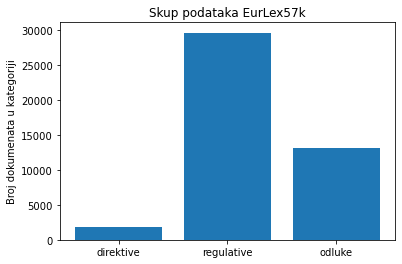

In [50]:
plt.bar(['direktive', 'regulative', 'odluke'], [number_of_directives, number_of_regulations, number_of_decisions])
plt.title('Skup podataka EurLex57k')
plt.ylabel('Broj dokumenata u kategoriji')
plt.show()

На основу приказа можемо закључити да су регулативе најбројнији тип докумената.

## Припрема скупа података за задатак вишекласне класификације

У овој секцији припремићемо скупове података којима располажемо за задатак вишелабеларне класификације.

Концепти EuroVoc тезауруса су хијерархијски организовани и разврстани у 21 главна домена и укупно 127 микротезауруса, мања тезауруса, од којих сваки има свој јединствен број и јединствену листу концепата. Тако, на пример, домен 36 представља науку (енгл. science) са концептима разврстаним у два микротезауруса под бројевима 3606 и 3611. Тезаурус са бројем 3606 садржи концепте везане за природне и примењене науке, а тезаурус са бројем 3611 концепте везане за хуманистичке науке. Речник *mappings_domain_to_microthesaurus* садржи информације о доменима и њиховим микротезаурусима. 

In [318]:
mappings_domain_to_microthesaurus = {
    '04': ['0406', '0411', '0416', '0421', '0426', '0431', '0436'],
    '08': ['0806', '0811', '0816', '0821'],
    '10': ['1006', '1011', '1016', '1021'],
    '12': ['1206', '1211', '1216', '1221', '1226', '1231', '1236'],
    '16': ['1606', '1611', '1616', '1621', '1626', '1631'],
    '20': ['2006', '2011', '2016', '2021', '2026', '2031', '2036'],
    '24': ['2406', '2411', '2416', '2421', '2426', '2431', '2436', '2441', '2446', '2451'],
    '28': ['2806', '2811', '2816', '2821', '2826', '2831', '2836', '2841', '2846'],
    '32': ['3206', '3211', '3216', '3221', '3226', '3231', '3236'],
    '36': ['3606', '3611'],
    '40': ['4006', '4011', '4016', '4021', '4026', '4031'],
    '44': ['4406', '4411', '4416', '4421', '4426'],
    '48': ['4806', '4811', '4816', '4821', '4826'],
    '52': ['5206', '5211', '5216'],
    '56': ['5606', '5611', '5616', '5621', '5626', '5631', '5636', '5641'],
    '60': ['6006', '6011', '6016', '6021', '6026', '6031', '6036'],
    '64': ['6406', '6411', '6416'],
    '66': ['6606', '6611', '6616', '6621', '6626'],
    '68': ['6806', '6811', '6816', '6821', '6826', '6831', '6836', '6841', '6846'],
    '72': ['7206', '7211', '7216', '7221', '7226', '7231', '7236', '7241'],
    '76': ['7606', '7611', '7616', '7621', '7626']
}

Наш задатак ће бити да припремимо скупове података тако што ћемо све концепте које су им придружене упарити са одговарајућим микротезаурусом и његовим доменом. Информације о томе који концепт припада ком тезаурусу се налазе у датотеци . Ова датотека за сваки од микротезауруса садржи списак концепата који му припадају. 

In [319]:
def explain_domain(mappings, domain):
    #TODO:
    microthesaurus = mappings[domain]
    return concept_names(eurovoc_pd, microthesaurus)

In [321]:
explain_domain(mappings_domain_to_microthesaurus, '48')

['Barbados', 'database', 'TAB', 'development bank', 'land bank']

In [323]:
concept_names(eurovoc_pd, ['3131', '2949', '172'])

['force reduction', 'air traffic control', 'traffic regulations']

In [77]:
import numpy as np

In [325]:
def assign_categories(concepts, mappings):
    number_of_categories = len(mappings)
    categories = np.zeros(number_of_categories, dtype='int')
    
    for concept in concepts:
        for i, (c, labels) in enumerate(mappings.items()):
            if concept in labels:
                categories[i] = 1
    
    return categories

In [327]:
assign_categories(['1309', '2300', '3591', '5034'], mappings_domain_to_microthesaurus)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
number_of_labels = 21
number_of
matrix_with_labels = np.zeros(train_data_pd.shape[0], )

In [329]:
reasigned_categoris = train_data_pd['eurovoc_concepts'].apply(lambda concepts: assign_categories(concepts, mappings_domain_to_microthesaurus))

In [330]:
reasigned_categoris.shape

(45000,)

In [119]:
train_data_pd['eurovoc_concepts'].loc[0]

['1402', '2771', '3191', '5055', '519', '5969', '5971']

In [120]:
reasigned_categoris[0]

0

In [121]:
train_data_pd['eurovoc_concepts'].loc[1]

['2319', '2713', '2938', '693']

In [122]:
reasigned_categoris[1]

0

In [125]:
np.sum(reasigned_categoris!=0)

1857

In [110]:
sums.shape

(21,)

In [126]:
all_concepts = []
    
for row in train_data_pd.itertuples():
    all_concepts.append(row[4])
        
all_concepts_merged = list(itertools.chain(*all_concepts))

In [127]:
len(all_concepts_merged)

228322

In [128]:
all_concepts_unique = set(all_concepts_merged)

In [131]:
all_concepts_unique = list(all_concepts_unique)

In [132]:
len(all_concepts_unique )

4108

In [136]:
all_suported = []
for i, (k, v) in enumerate(mappings.items()):
    print(v)
    all_suported.append(v)

['0406', '0411', '0416', '0421', '0426', '0431', '0436']
['0806', '0811', '0816', '0821']
['1006', '1011', '1016', '1021']
['1206', '1211', '1216', '1221', '1226', '1231', '1236']
['1606', '1611', '1616', '1621', '1626', '1631']
['2006', '2011', '2016', '2021', '2026', '2031', '2036']
['2406', '2411', '2416', '2421', '2426', '2431', '2436', '2441', '2446', '2451']
['2806', '2811', '2816', '2821', '2826', '2831', '2836', '2841', '2846']
['3206', '3211', '3216', '3221', '3226', '3231', '3236']
['3606', '3611']
['4006', '4011', '4016', '4021', '4026', '4031']
['4406', '4411', '4416', '4421', '4426']
['4806', '4811', '4816', '4821', '4826']
['5206', '5211', '5216']
['5606', '5611', '5616', '5621', '5626', '5631', '5636', '5641']
['6006', '6011', '6016', '6021', '6026', '6031', '6036']
['6406', '6411', '6416']
['6606', '6611', '6616', '6621', '6626']
['6806', '6811', '6816', '6821', '6826', '6831', '6836', '6841', '6846']
['7206', '7211', '7216', '7221', '7226', '7231', '7236', '7241']
['76

In [134]:
all_suported_merged = list(itertools.chain(*all_suported))

In [140]:
len(all_suported_merged)

127

In [141]:
all_concepts_unique

['1060',
 '4608',
 '5311',
 '1185',
 '1761',
 '1486',
 '5634',
 '409',
 '5898',
 '4197',
 '2730',
 '1229',
 '2921',
 '1074',
 '5151',
 '1385',
 '1275',
 '2113',
 '5078',
 '2695',
 '3970',
 '2301',
 '5775',
 '2273',
 '3481',
 '5261',
 '3806',
 '2288',
 '1393',
 '3598',
 '1969',
 '439592',
 '63',
 '1321',
 '4857',
 '3732',
 '3225',
 '4767',
 '2054',
 '3673',
 '1274',
 '1989',
 '4351',
 '1946',
 '5404',
 '1738',
 '3869',
 '201',
 '4830',
 '6121',
 '6884',
 '1662',
 '2765',
 '3895',
 '3776',
 '2646',
 '2839',
 '3453',
 '6016',
 '5236',
 '4016',
 '3348',
 '7814',
 '240',
 '1490',
 '656',
 '2541',
 '3010',
 '3890',
 '475',
 '624',
 '5248',
 '2038',
 '1302',
 '2925',
 '3946',
 '544',
 '5705',
 '2723',
 '2026',
 '3908',
 '4900',
 '5787',
 '4316',
 '2902',
 '2408',
 '642',
 '2820',
 '1821',
 '3805',
 '3172',
 '1058',
 '4082',
 '1667',
 '4467',
 '3772',
 '1230',
 '2589',
 '4059',
 '7977',
 '4264',
 '764',
 '3635',
 '2492',
 '2955',
 '5063',
 '635',
 '4395',
 '5019',
 '1826',
 '152',
 '3026',
 '3

In [154]:
eurovoc_pd[eurovoc_pd['id']=='3292']

,id,title
1924,3292,optics


## Документи који се односе на науку

У овој секцији ћемо из скупа података посебно издвојити документе који носе једно од обележја-лабела EuroVoc тезауруса који се односе на науку. Две кровне поделе у тезаурусу су природне и примењене науке (са обележјем 3606) и хуманистичке науке (са обележјем 3611). Свака од ових подела даље има своје суптилније поделе. На пример, природне и примењене науке се деле на примењене науке (енгл. applied sciences), науке о земљи (енг. earth science), науке о животу (енг. life science), физичке науке (енг. physical sciences) и науке о свемиру (енг. space science), док географија, геологија и екологија представљају само неке од наука које се класификују као науке о земљи. У наставку следе пописи идентификатора природних и примењених наука и хуманистичких наука, онако како се могу видети у хијерархијском приказу EuroVoc тезауруса.    

In [208]:
natural_and_applied_sciences = {
    '3949': [
        '685', '3293', '710', '5968', '3925', '1835', '7410', '1896'
    ], 
    '3952': [
        'c_a935cf3f', '1148', '5269', '6387', '1149', '7218', '7360', '6388', '1150', '6389', \
        '1151', '1147', '1152', '1276', '1936', '3294', '6391', '4176', '4770', \
        '6390', '6715', '1278', '1892', '6384', '6385', '2114', '3931', '6381', '6386', '6392'
    ],
    '3941': [
        '4921', '5028', '5303', '5608', '5651', '6260', '6744', 'c_2c5a05a0', '1246', '5740', \
        'c_ff4dd793', '3282', '5338', '7955', 'c_5db9ac34', '4810', '442765', '632', '2232', '2367'
    ], 
    '3946': [
        '3291', '4107', '5966', '5300', '4889', '6111', '707', '2373', '709', '5287', '4110', '2376', \
        '5299', '5298', '3292', 'c_590e8349', '4109', '5301', '4108'
    ], 
    '6382': [
        '6383', '3790', '6716'
    ]
}

In [315]:
humanities = {
    
}

Пошто нам је циљ да направимо класификатор који документа која припадају науци финије класификује на природне науке и примене тј. хуманистичке науке, потребно је да припремимо и подесне скупове докумената. Проширићемо учитане скупове података колоном is_natural_science: ако је вредност ове колоне 1 то ће значити да документ припада групи природних и примењених наука, а ако је вредност ове колоне 0 то ће значити да документ припада хуманистичким наукама. Прокоментаришимо да смо могли користити и колону is_humanities али да би ова информација била редундантна. 

Да бисмо са лакоћом могли да придружимо документима тражена обележја, прво ћемо сузити скуп на скуп докумената који припадају науци, а потом их финије поделити. 

In [316]:
def get_natural_and_applied_science_ids(domain='all'): 
       
    if domain == 'all':
        ids = []
        for (k, v) in natural_and_applied_sciences.items():
            for id in v:
                ids.append(id)
            ids.append(k)
    else:
        ids = natural_and_applied_sciences[domain]
        ids.append(domain)
                
    return ids

In [317]:
def is_natural_and_applied_science(concept_ids, domain='all'):
    science_ids = get_natural_and_applied_science_ids(domain)
    return len(set(science_ids).intersection(concept_ids)) != 0

In [ ]:
def is_humanities(concept_ids, domain='all'):
    # TODO
    science_ids = get_natural_and_applied_science_ids(domain)
    return len(set(science_ids).intersection(concept_ids)) != 0

In [237]:
all_relevаant_ids = get_natural_and_applied_science_ids()

In [238]:
len(all_relevant_ids)

7743

In [220]:
is_natural_and_applied_science(['1309', '3607', '3591', '5034'])

False

In [221]:
science_data_pd = train_data_pd[train_data_pd['eurovoc_concepts'].apply(lambda concept_ids: is_natural_and_applied_science(concept_ids))]

In [222]:
science_data_pd.shape

(638, 4)

In [217]:
get_natural_and_applied_science_ids('6382')

['6383', '3790', '6716', '6382', '3606']

In [224]:
pd_6382 = science_data_pd[science_data_pd['eurovoc_concepts'].apply(lambda concept_ids: is_natural_and_applied_science(concept_ids, domain='6382'))]

In [225]:
pd_6382.shape

(5, 4)

In [226]:
pd_3946 = science_data_pd[science_data_pd['eurovoc_concepts'].apply(lambda concept_ids: is_natural_and_applied_science(concept_ids, domain='3946'))]

In [227]:
pd_3946.shape

(319, 4)

In [228]:
pd_3952 = science_data_pd[science_data_pd['eurovoc_concepts'].apply(lambda concept_ids: is_natural_and_applied_science(concept_ids, domain='3952'))]

In [229]:
pd_3952.shape

(17, 4)

In [230]:
pd_3941 = science_data_pd[science_data_pd['eurovoc_concepts'].apply(lambda concept_ids: is_natural_and_applied_science(concept_ids, domain='3941'))]

In [231]:
pd_3941.shape

(285, 4)

In [232]:
pd_3949 = science_data_pd[science_data_pd['eurovoc_concepts'].apply(lambda concept_ids: is_natural_and_applied_science(concept_ids, domain='3949'))]

In [233]:
pd_3949.shape

(46, 4)

In [240]:
science_data_pd.iloc[0]

celex_id                                                   31982D0211
title               82/211/EEC: Commission Decision of 17 March 19...
text                COMMISSION  DECISION\nof 17 March 1982\nestabl...
eurovoc_concepts                 [1091, 3842, 3874, 4110, 4381, 5287]
Name: 3, dtype: object

In [275]:
for row in science_data_pd.itertuples():
    print(row[4])

['1091', '3842', '3874', '4110', '4381', '5287']
['191', '2232', '2415', '3579', '4490', '5100']
['1091', '3291', '3842', '4381', '5301']
['1595', '1763', '191', '2232', '3156']
['1631', '2747', '3885', '4891', '5300', '893']
['1439', '1895', '3489', '3949', '4258', '4415']
['1255', '3011', '4359', '5181', '7410']
['1091', '3842', '4381', '4810', '5722']
['1091', '3842', '4381', '707']
['1277', '1442', '5300', '5967', '6057']
['1091', '3842', '4381', '5300']
['1091', '2159', '3842', '4381', '5301']
['1091', '2192', '3842', '4381', '5298']
['1264', '1442', '2069', '2081', '4381', '5300']
['1091', '3292', '3842', '4381', '5301']
['1755', '1854', '2211', '5252', '5369', '5608', '619']
['1091', '3842', '4381', '5301']
['1277', '1590', '6052', '6111', '768']
['1091', '2159', '3291', '3842', '4381', '5301']
['336', '4081', '5028', '5360', '893']
['1309', '1445', '2300', '3408', '4921', '5283']
['1091', '3842', '4381', '5300']
['1595', '1763', '192', '2232', '2680', '4765', '5283', '775']
['1

In [284]:
len(set(['1755', '1854', '2211', '5252', '5369', '5608', '619']).intersection(natural_and_applied_sciences['3941']))

1

In [293]:
def prepare_dataset(data_pd):
    categories = ['3949', '3952', '3941', '3946', '6382']
    categories_distribution = {'3949': 0, '3952':0, '3941':0, '3946':0, '6382':0}
    number_of_categories = 5
    multilabel_documents = 0
    
    for row in data_pd.itertuples():
        doc_labels = []
        for category in categories:
            common_categories = set(row[4]).intersection(natural_and_applied_sciences[category]) 
#             print(common_categories)
            if len(common_categories)!=0:
                doc_labels.append(category)
                categories_distribution[category] += 1
        if len(doc_labels)!=1:
            multilabel_documents += 1
        
            
    print(multilabel_documents)
    print(categories_distribution)

In [294]:
prepare_dataset(train_data_pd)

44396
{'3949': 46, '3952': 17, '3941': 285, '3946': 319, '6382': 5}


In [295]:
test_data_pd = pd.DataFrame(test_data)

In [296]:
prepare_dataset(test_data_pd)

5929
{'3949': 2, '3952': 3, '3941': 31, '3946': 43, '6382': 2}


In [297]:
validation_data_pd = pd.DataFrame(validation_data)

In [298]:
prepare_dataset(validation_data_pd)

5929
{'3949': 8, '3952': 2, '3941': 37, '3946': 34, '6382': 0}


In [42]:
eurovoc_pd[eurovoc_pd['id']=='5369']

,title,id
1057,health certificate,5369
